In [1]:
import numpy as np
class Linear:
    def __init__(self, m, n):
        # divide by 8 to normalization
        self.W = np.random.randn(m, n)/8.0
        self.b = np.random.rand(1, n)/8.0
        self.dW, self.db = None, None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W)+self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

class ReLU:
    def __init__(self):
        pass

    def forward(self, x):
        self.mask = (x<=0)
        out = x
        out[out<=0] = 0
        return out

    def backward(self, dout):
        dx = dout
        dx[self.mask] = 0
        return dx

class Sigmoid:
    def __init__(self):
        pass

    def forward(self, x):
        out = 1.0/(1+np.exp(-x))
        self.o = out
        return out

    def backward(self, dout):
        dx = dout*self.o*(1-self.o)
        return dx

class tanh:
    def __init__(self):
        pass

    def forward(self, x):
        out = np.tanh(x)
        self.o = out
        return out

    def backward(self, dout):
        dx = dout*(1.0 - self.o**2)
        return dx


class Loss:
    def __init__(self):
        pass
    def forward(self, y, ybar):
        self.y = y
        self.ybar = ybar
        return np.sum((y-ybar)**2)
    def backward(self, dout):
        dy = -(2*(self.y -self.ybar))
        return dy

In [2]:
class MLP:
# to Construct a MLP class, you shold take the your data input degree,
# output degree and each layer type. This class provide the three types
# of activate function. They are ReLU(), Sigmoid() and tanh(). To use 
# this class, you shold follow the Example below:
#
#     model = MLP(8, ['relu', 'tanh', 'sigmoid'], [100, 20, 1])
#
# So 
#   - the firdt 'intger' 8 position means the input degree (data shape)
#     with numpy.array
#   - the following 'list' means the layer activation function type
#   - the last 'list' mean the each layer output degree (data shape)
# this example means: creating a model with 3 layers. the 1st layer is a
# linear layer of 10 neurons ReLU() activation function; the 2nd layer is
# a linear layer of 10 neurons with the tanh() activation function; the 
# last layer is a Linear layer of 1 neuron with the Sigmoid(). Each input
# vector has 8 inputs.

    def __init__(self, inDegree:int, layerType:list, outDegree):
        self.degree = list(map(int, str(inDegree))) + outDegree
        layerType = [x.lower() for x in layerType]
        self.supportFuncTable = {
            # to add type, make sure no () follow class name
            # when calling may use self.supportFuncTable[key]()
            # to construct
            'relu' : ReLU,
            'sigmoid' : Sigmoid,
            'tanh' : tanh
            }
        
        self.layers = []
        self.actFunctions = []
        self.last_dW ,self.last_db = [], []
        for i in range(len(self.degree)-1):
            self.layers.append(Linear(self.degree[i], self.degree[i+1]))
            self.actFunctions.append(self.supportFuncTable[layerType[i]]())
            self.last_dW.append(0)
            self.last_db.append(0)
        self.loss = Loss()

    def forward(self, x):
        # not to iteration, that make a reference, make code not work
        for i in range(len(self.layers) - 1):
            x = self.layers[i].forward(x)
            x = self.actFunctions[i].forward(x)
        x = self.layers[-1].forward(x)
        self.ybar = self.actFunctions[-1].forward(x)
        return self.ybar 

    def backward(self, y):
        self.L = self.loss.forward(y, self.ybar)
        g = self.loss.backward(1)
        # not to iteration, that make a reference, make code not work
        for i in range(len(self.layers)-1, -1, -1):
            g = self.actFunctions[i].backward(g)
            g = self.layers[i].backward(g)
    
    def update(self, eta, alpha):
        # not to iteration, that make a reference, make code not work
        for i in range(len(self.layers)):
            self.layers[i].W += -eta*self.layers[i].dW + alpha*self.last_dW[i]
            self.layers[i].b += -eta*self.layers[i].db + alpha*self.last_db[i]
            self.last_dW[i] = eta*self.layers[i].dW
            self.last_db[i] = eta*self.layers[i].db

    def predict(self, x):
        self.forward(x)
        return np.array([1]) if model.ybar > 0.5 else np.array([0])
         

In [3]:
import numpy as np
def getParityBit(bitString:str) -> int:
    if type(bitString) is not str:
        raise TypeError('Expected str; got %s' % type(bitString))
    parityBit = False
    for c in bitString:
        if c == '1':
            parityBit = not parityBit
            
    rel = 1 if parityBit else 0
    return rel

def getData():
    dataSet = []
    label = []
    for i in range(256):
        binaryString = '{0:08b}'.format(i)
        dataSet.append(list(map(int, binaryString)))
        label.append([getParityBit(binaryString)])
    return (np.array(dataSet), np.array(label))

In [4]:
trainData, trainLabel = getData()

model = MLP(8, 
            ['relu', 'sigmoid'],
            [100, 1])
max_epochs, chk_epochs = 15000, 1000
eta, alpha = 0.001, 0.0001

pointOfEporch = []
pointOfLoss = []

for e in range(max_epochs):
    model.forward(trainData)
    model.backward(trainLabel)
    model.update(eta, alpha)
    if (e+1) % chk_epochs == 0:
        # print(model.ybar.T)
        print('On epoch {0:6d}: loss = {1:>10.6f}'.format(e+1, model.L))
        pointOfEporch.append(e), pointOfLoss.append(model.L)


On epoch   1000: loss =  58.618590
On epoch   2000: loss =  43.083171
On epoch   3000: loss =  31.324450
On epoch   4000: loss =  20.564830
On epoch   5000: loss =  11.728896
On epoch   6000: loss =   6.731768
On epoch   7000: loss =   3.963690
On epoch   8000: loss =   2.748712
On epoch   9000: loss =   2.053756
On epoch  10000: loss =   1.608008
On epoch  11000: loss =   1.269714
On epoch  12000: loss =   1.042312
On epoch  13000: loss =   0.877034
On epoch  14000: loss =   0.752494
On epoch  15000: loss =   0.654492


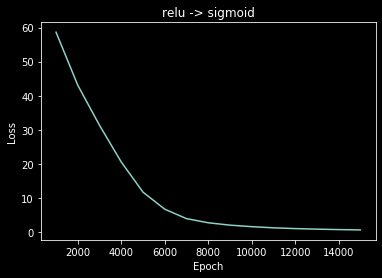

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("relu -> sigmoid")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(pointOfEporch, pointOfLoss)
plt.savefig('./2relu.png')
plt.show()

In [6]:
trainData, trainLabel = getData()

model = MLP(8, 
            ['relu', 'relu', 'sigmoid'],
            [100, 20, 1])
max_epochs, chk_epochs = 15000, 1000
eta, alpha = 0.001, 0.0001

pointOfEporch = []
pointOfLoss = []

for e in range(max_epochs):
    model.forward(trainData)
    model.backward(trainLabel)
    model.update(eta, alpha)
    if (e+1) % chk_epochs == 0:
        # print(model.ybar.T)
        print('On epoch {0:6d}: loss = {1:>10.6f}'.format(e+1, model.L))
        pointOfEporch.append(e), pointOfLoss.append(model.L)


On epoch   1000: loss =  58.975211
On epoch   2000: loss =  28.378507
On epoch   3000: loss =   0.947270
On epoch   4000: loss =   0.345756
On epoch   5000: loss =   0.190745
On epoch   6000: loss =   0.125980
On epoch   7000: loss =   0.091760
On epoch   8000: loss =   0.070973
On epoch   9000: loss =   0.057331
On epoch  10000: loss =   0.047750
On epoch  11000: loss =   0.040697
On epoch  12000: loss =   0.035340
On epoch  13000: loss =   0.031131
On epoch  14000: loss =   0.027751
On epoch  15000: loss =   0.024977


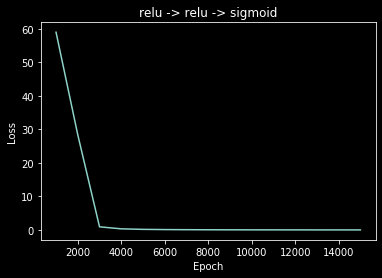

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("relu -> relu -> sigmoid")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(pointOfEporch, pointOfLoss)
plt.savefig('./3relu.png')
plt.show()


In [8]:
trainData, trainLabel = getData()

model = MLP(8, 
            ['relu', 'relu', 'relu', 'sigmoid'],
            [100, 50, 20, 1])
max_epochs, chk_epochs = 15000, 1000
eta, alpha = 0.001, 0.0001

pointOfEporch = []
pointOfLoss = []

for e in range(max_epochs):
    model.forward(trainData)
    model.backward(trainLabel)
    model.update(eta, alpha)
    if (e+1) % chk_epochs == 0:
        # print(model.ybar.T)
        print('On epoch {0:6d}: loss = {1:>10.6f}'.format(e+1, model.L))
        pointOfEporch.append(e), pointOfLoss.append(model.L)


On epoch   1000: loss =  55.208929
On epoch   2000: loss =   1.416372
On epoch   3000: loss =   0.143090
On epoch   4000: loss =   0.062528
On epoch   5000: loss =   0.037772
On epoch   6000: loss =   0.026342
On epoch   7000: loss =   0.019926
On epoch   8000: loss =   0.015854
On epoch   9000: loss =   0.013068
On epoch  10000: loss =   0.011059
On epoch  11000: loss =   0.009549
On epoch  12000: loss =   0.008373
On epoch  13000: loss =   0.007431
On epoch  14000: loss =   0.006669
On epoch  15000: loss =   0.006031


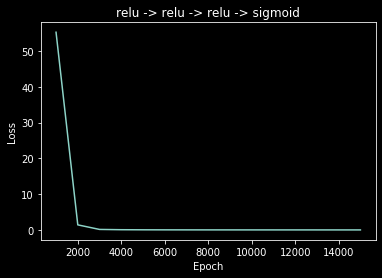

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("relu -> relu -> relu -> sigmoid")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(pointOfEporch, pointOfLoss)
plt.savefig('./4relu.png')
plt.show()


In [10]:
trainData, trainLabel = getData()

model = MLP(8, 
            ['relu', 'tanh', 'sigmoid'],
            [100, 20, 1])
max_epochs, chk_epochs = 15000, 1000
eta, alpha = 0.001, 0.0001

pointOfEporch = []
pointOfLoss = []

for e in range(max_epochs):
    model.forward(trainData)
    model.backward(trainLabel)
    model.update(eta, alpha)
    if (e+1) % chk_epochs == 0:
        # print(model.ybar.T)
        print('On epoch {0:6d}: loss = {1:>10.6f}'.format(e+1, model.L))
        pointOfEporch.append(e), pointOfLoss.append(model.L)


On epoch   1000: loss =  61.049149
On epoch   2000: loss =  46.888594
On epoch   3000: loss =  34.729526
On epoch   4000: loss =   1.087613
On epoch   5000: loss =   0.373712
On epoch   6000: loss =   0.195993
On epoch   7000: loss =   0.126734
On epoch   8000: loss =   0.091646
On epoch   9000: loss =   0.070134
On epoch  10000: loss =   0.056177
On epoch  11000: loss =   0.046528
On epoch  12000: loss =   0.039500
On epoch  13000: loss =   0.034188
On epoch  14000: loss =   0.030052
On epoch  15000: loss =   0.026750


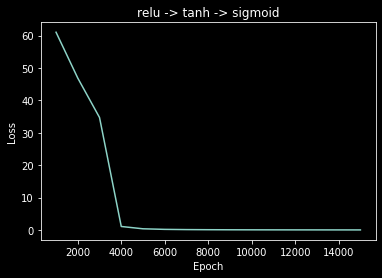

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("relu -> tanh -> sigmoid")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(pointOfEporch, pointOfLoss)
plt.savefig('./relu-tanh.jpg')
plt.show()